<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/HW3_sDaniels/shar_final_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [ ]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


Both samples of earthquake time gaps (the sample with high magnitude cuts and without) come from the same parent distribution.




    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The KS statistic d_kl is the "maximum difference, in absolute value, between the rescaled cumulative distributions of the two data sets" (Corral). 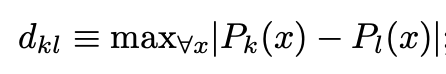

d_kl can be compared to the theoretical culumative distribution function.



    3 What does the probability distribution of this statistic depend on?
    
   


It only depends on the number of data in each of the sets of samples!

The full formula for the probability distribution is:

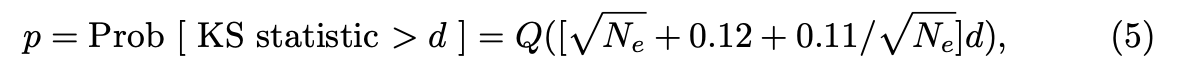

"with Q a decreasing function taking values between 1 and 0 (see Ref. 31) and Ne an effective number of data points (the “reduced” number, or one half of the harmonic mean of the number of data)" (Corral page 5).
    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

here is the map from https://watermark.silverchair.com/904_953_04168.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm[…]LilwbAB_Cn4dUXqdhwJKf6Aepx61ioUSe7Hx5uVLjItuf-BvIiurF61g

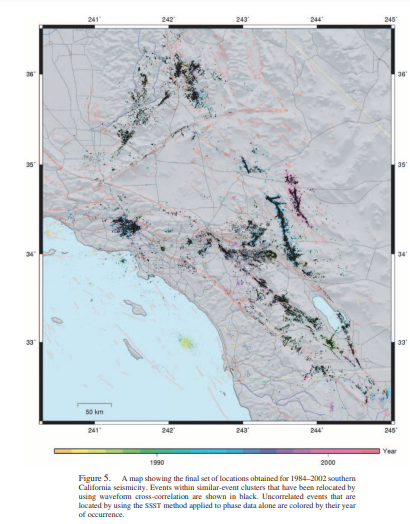

and we are looking for "The catalog spans the years 1984-2002 (included), containing 77034 earthquakes with magnitude M ≥ 2. " (page 3)

I have slightly more earthquakes than Fed but still less than 77000. (I have 72219.) Not really reproducible if we can't get their exact data!

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [ ]:
eqs = pd.read_csv("https://raw.githubusercontent.com/SHDaniels/DSPS_sDaniels/main/earthquakes_sDaniels.csv",
                  delimiter=" ",skipinitialspace=True, header=2, skipfooter=2)

<ipython-input-2-fdea5f32f0a2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  eqs = pd.read_csv("https://raw.githubusercontent.com/SHDaniels/DSPS_sDaniels/main/earthquakes_sDaniels.csv",


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

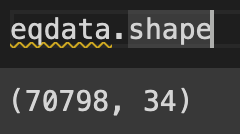

In [ ]:
eqs.shape #this is okay because i cut out my extra lines

(72219, 13)

In [ ]:
#eqdata.head()

In [ ]:
eqs.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [ ]:
#eqdata.describe()

In [ ]:
eqs.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [ ]:
eqs.rename({"#YYY/MM/DD": "date",
            "HH:mm:SS.ss": "time",
            "MAG":"mag"},axis=1,inplace=True)

In [ ]:
eqs.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [ ]:
#eqdata.head()

In [ ]:
#eqdata.describe()

In [ ]:
eqs.describe()

,mag,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [ ]:
eqs.time.dtype, eqs.date.dtype
#string

(dtype('O'), dtype('O'))

In [ ]:
#eqdata.time.dtype, eqdata.date.dtype

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [ ]:
#list comprehension: in a for loop - first what is the action,
#and then the for part
#list comprehensions are more elegant and better
eqs["datetime"] = [eqs.iloc[i]["date"]+" "+eqs.iloc[i]["time"] for i in range(len(eqs))]
                   #now we have date time objects

In [ ]:
eqs.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984/01/01 01:30:57.52
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984/01/01 05:31:34.16
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984/01/01 06:59:05.14
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984/01/01 11:10:25.29
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984/01/01 13:50:47.62


In [ ]:
newdtcol = [] #this code is from sid thank u sid!

for dt in eqs["datetime"]:
  mins = int(dt[14:16])
  secs = int(dt[17:19])

  if secs==60:
    newsecs = secs - 60
    newmins = mins + 1

    newdt = dt[:14] + str(newmins) + dt[16] + str(newsecs) + dt[19:]

  else:
    newdt = dt

  newdtcol.append(newdt)

In [ ]:
eqs["datetime"]=newdtcol

In [ ]:
secs

58

In [ ]:
# eqs.iloc[i]["datetime"][:15]+str(int(eqs.iloc[i]["datetime"][15])+1)+":"+str(0)+eqs.iloc[i]["datetime"][18:]

In [ ]:
eqs["datetime"] = pd.to_datetime(eqs["datetime"])

In [ ]:
eqs["datetime"].dtype

dtype('<M8[ns]')

In [ ]:
# i=1684
# eqs.iloc[i]["datetime"]=eqs.iloc[i]["datetime"][:15]+str(int(eqs.iloc[i]["datetime"][15])+1)+":"+str(0)+eqs.iloc[i]["datetime"][18:]

In [ ]:
eqs.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620


In [ ]:
#eqdata.head()

## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [ ]:
# i am using fed's code :) thanks fed
# first I create the timetamps pairs for the beginning and end of the valid periods.
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

############
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]:

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))


############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
ss

############



the 11 timestamp pairs that are the boundaries of good data periods are:


[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [ ]:
# data between start and end of first time period
gooddates = (((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqs.datetime >=ss [1][0]) * (eqs.datetime <= ss[1][1])) +\
        ((eqs.datetime >=ss [2][0]) * (eqs.datetime <= ss[2][1])) +\
        ((eqs.datetime >=ss [3][0]) * (eqs.datetime <= ss[3][1])) +\
        ((eqs.datetime >=ss [4][0]) * (eqs.datetime <= ss[4][1])) +\
        ((eqs.datetime >=ss [5][0]) * (eqs.datetime <= ss[5][1])) +\
        ((eqs.datetime >=ss [6][0]) * (eqs.datetime <= ss[6][1])) +\
        ((eqs.datetime >=ss [7][0]) * (eqs.datetime <= ss[7][1])) +\
        ((eqs.datetime >=ss [8][0]) * (eqs.datetime <= ss[8][1])) +\
        ((eqs.datetime >=ss [9][0]) * (eqs.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqs.datetime >=ss [10][0]) * (eqs.datetime <= ss[10][1])\
        ).values)

In [ ]:
gooddates

0        True
1        True
2        True
3        True
4        True
         ... 
72214    True
72215    True
72216    True
72217    True
72218    True
Name: datetime, Length: 72219, dtype: bool

In [ ]:
gooddates.sum()

16941

The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [ ]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [ ]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 16941 earthquakes falling in the selected stationary periods


In [ ]:
# your code here: broadcasting to create a dataframe with the good dates only
eqGoodData = eqs[gooddates]

In [ ]:
eqGoodData.shape

(16941, 14)

In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [ ]:
# I chose M>2 when when I downloaded the data so no need
eqGoodData["mag"].min()

2.0

In [ ]:
eqGoodData.shape

(16941, 14)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [ ]:
eqGoodData['datetime']

0       1984-01-01 01:30:57.520
1       1984-01-01 05:31:34.160
2       1984-01-01 06:59:05.140
3       1984-01-01 11:10:25.290
4       1984-01-01 13:50:47.620
                  ...          
72214   2002-12-30 23:38:49.790
72215   2002-12-31 05:51:00.050
72216   2002-12-31 06:15:19.970
72217   2002-12-31 11:34:28.030
72218   2002-12-31 21:59:58.920
Name: datetime, Length: 16941, dtype: datetime64[ns]

In [ ]:
coltoadd = eqGoodData['datetime'].diff()

In [ ]:
coltoadd

0                          NaT
1       0 days 04:00:36.640000
2       0 days 01:27:30.980000
3       0 days 04:11:20.150000
4       0 days 02:40:22.330000
                 ...          
72214   0 days 01:46:57.240000
72215   0 days 06:12:10.260000
72216   0 days 00:24:19.920000
72217   0 days 05:19:08.060000
72218   0 days 10:25:30.890000
Name: datetime, Length: 16941, dtype: timedelta64[ns]

In [ ]:
eqGoodData['time_diff'] = coltoadd

<ipython-input-40-7cf60252d1d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqGoodData['time_diff'] = coltoadd


In [ ]:
eqGoodData

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.24600,-116.43300,1.6,C,28255,13,17,1984-01-01 01:30:57.520,NaT
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.94400,-118.32200,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,0 days 02:40:22.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72214,2002/12/30,23:38:49.79,eq,l,2.05,l,35.31450,-118.66333,1.9,A,9875061,54,283,2002-12-30 23:38:49.790,0 days 01:46:57.240000
72215,2002/12/31,05:51:00.05,eq,l,2.36,l,35.32367,-118.66067,0.1,A,9875093,65,465,2002-12-31 05:51:00.050,0 days 06:12:10.260000
72216,2002/12/31,06:15:19.97,eq,l,2.15,l,34.00350,-116.39317,10.3,A,9875101,91,572,2002-12-31 06:15:19.970,0 days 00:24:19.920000
72217,2002/12/31,11:34:28.03,eq,l,2.14,l,32.25667,-115.82533,6.8,C,9875125,23,118,2002-12-31 11:34:28.030,0 days 05:19:08.060000


In [ ]:
eqGoodData.shape

(16941, 15)

In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520,NaT
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,0 days 02:40:22.330000


In [ ]:
eqGoodData.describe()

,mag,LAT,LON,DEPTH,EVID,NPH,NGRM,time_diff
count,16941.000000,16941.000000,16941.000000,16941.000000,1.694100e+04,16941.000000,16941.000000,16940
mean,2.373139,34.057266,-117.080199,6.179948,4.158648e+06,34.349389,193.743404,0 days 09:49:55.710826446
std,0.378161,1.161609,1.135249,4.449025,4.022844e+06,23.932396,261.741326,13 days 11:31:41.650985097
min,2.000000,32.000000,-120.000000,-1.900000,2.825500e+04,0.000000,0.000000,0 days 00:00:00.170000
25%,2.100000,33.189670,-117.871330,3.400000,1.174150e+05,18.000000,64.000000,0 days 00:50:22.292500
50%,2.260000,34.035500,-116.855000,5.500000,3.187291e+06,29.000000,110.000000,0 days 02:46:31.070000
75%,2.520000,34.679000,-116.291000,8.200000,9.051971e+06,44.000000,201.000000,0 days 06:34:25.222500
max,5.800000,36.795000,-115.001000,27.900000,3.713122e+07,406.000000,3674.000000,1388 days 18:38:54.660000


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [ ]:
eqGoodData["time_diff"]/pd.Timedelta(1)

0                 NaN
1        1.443664e+13
2        5.250980e+12
3        1.508015e+13
4        9.622330e+12
             ...     
72214    6.417240e+12
72215    2.233026e+13
72216    1.459920e+12
72217    1.914806e+13
72218    3.753089e+13
Name: time_diff, Length: 16941, dtype: float64

In [ ]:
eqGoodData = eqGoodData.drop(index=0)

In [ ]:
eqGoodData.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160,0 days 04:00:36.640000
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140,0 days 01:27:30.980000
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290,0 days 04:11:20.150000
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,0 days 02:40:22.330000
5,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49,1984-01-01 19:38:19.790,0 days 05:47:32.170000


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

In [ ]:
#nanoseconds is not a readable unit - 10^9 seconds
nstomin=(60*(10**9)) #nanoseconds to minutes

In [ ]:
eqGoodData["time_diff"]/pd.Timedelta(nstomin)

1        240.610667
2         87.516333
3        251.335833
4        160.372167
5        347.536167
            ...    
72214    106.954000
72215    372.171000
72216     24.332000
72217    319.134333
72218    625.514833
Name: time_diff, Length: 16940, dtype: float64

In [ ]:
eqGoodData["time_diff"]/pd.Timedelta(minutes=1)

1        240.610667
2         87.516333
3        251.335833
4        160.372167
5        347.536167
            ...    
72214    106.954000
72215    372.171000
72216     24.332000
72217    319.134333
72218    625.514833
Name: time_diff, Length: 16940, dtype: float64

Text(0.5, 0, 'time differences (minutes)')

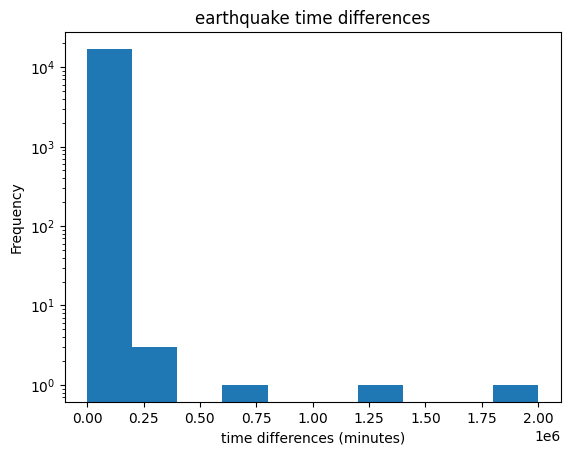

In [ ]:
(eqGoodData["time_diff"]/pd.Timedelta(minutes=1)).plot(kind="hist",
                                                       logy=True,
                                                       title="earthquake time differences",
                                                       xlabel="time differences (minutes)")
#putting it in minutes bc it needs to be a diferent object type (not a timedelta)
pl.xlabel("time differences (minutes)")

**Figure 2: time differences in earthquakes. we can see that the x axis goes up to 1e6 minutes, which indicates that we have introduced artificially large time gaps between earthquakes by cutting out periods of time. we will solve this by removing gaps that are larger than a month.**

In [ ]:
# eqGoodData["time_diff"].plot(kind="hist")

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [ ]:
eqGoodData["time_diff"]
#nanoseconds in a month
#month is 1/12 of 365.25 days, 24 hours in a day, 3600 seconds in a hour, 10^9 ns in a second
month = (365.25/12)*24*3600*(10**9)
month

2629800000000000.0

In [ ]:
timedelta64(int(month))

numpy.timedelta64(2629800000000000)

In [ ]:
map2=eqGoodData["time_diff"]<timedelta64(int(month))

Text(0.5, 0, 'time differences (minutes)')

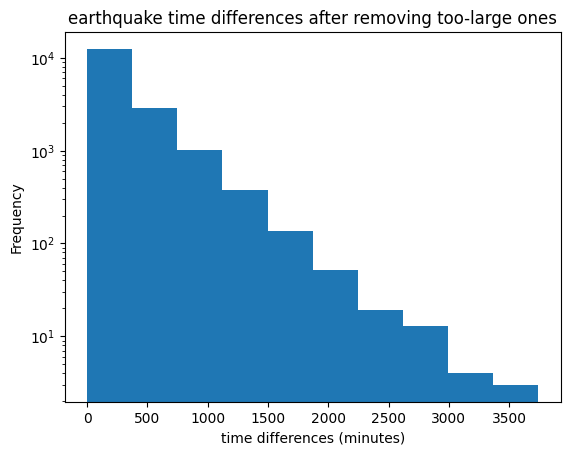

In [ ]:
(eqGoodData["time_diff"][map2]/pd.Timedelta(minutes=1)).plot(kind="hist",
                                                       logy=True,
                                                       title="earthquake time differences after removing too-large ones",
                                                       xlabel="time differences (minutes)")
#putting it in minutes bc it needs to be a diferent object type (not a timedelta)
pl.xlabel("time differences (minutes)")

**figure 3: similar to figure 2 but the maximum time difference is now 3500 minutes, solving our artificially-large-gap problem. the fact that there are no outliers in this data make us feel confident that we have chosen a reasonable cut-off.**

Text(0.5, 0, 'time differences (ns)')

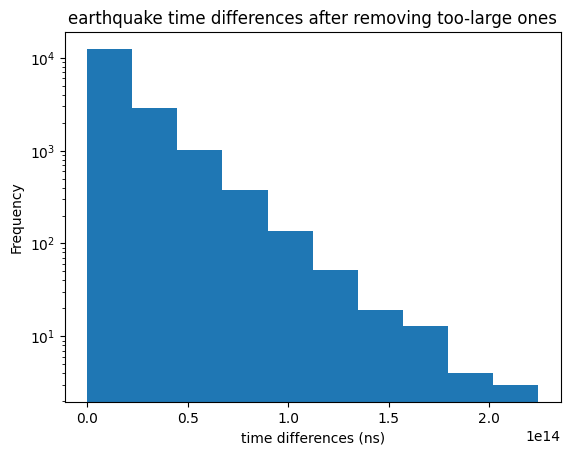

In [ ]:
(eqGoodData["time_diff"][map2]/pd.Timedelta(1)).plot(kind="hist",
                                                       logy=True,
                                                       title="earthquake time differences after removing too-large ones",
                                                       xlabel="time differences (minutes)")
#putting it in minutes bc it needs to be a diferent object type (not a timedelta)
pl.xlabel("time differences (ns)")

**figure 4: same data as figure 3 but  scaling by ns instead of minutes**

In [ ]:
#okay so let's apply that to the whole dataframe
eqRealGoodData = eqGoodData[map2]

In [ ]:
eqRealGoodData.shape

(16930, 15)

Text(0.5, 0, 'time differences (minutes)')

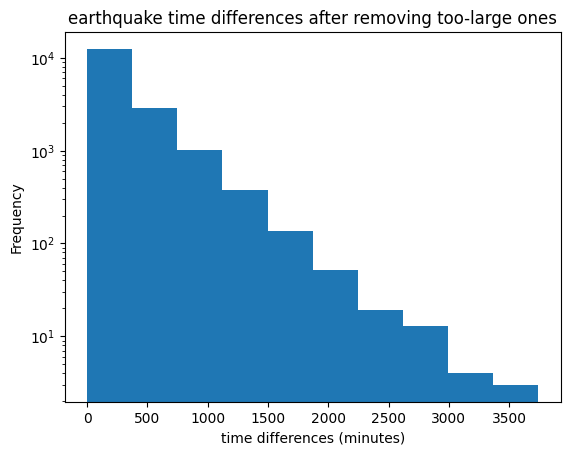

In [ ]:
(eqRealGoodData["time_diff"]/pd.Timedelta(minutes=1)).plot(kind="hist",
                                                       logy=True,
                                                       title="earthquake time differences after removing too-large ones",
                                                       xlabel="time differences (minutes)")
#putting it in minutes bc it needs to be a diferent object type (not a timedelta)
pl.xlabel("time differences (minutes)")

**figure 5: same data as figure 3 but after actually saving the data manipulation - just making sure it worked right**

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

In [ ]:
alpha = .003 #3 sigma threshold means .997% probability

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/main/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [ ]:
#find average time gap
avg = eqRealGoodData["time_diff"].mean()



In [ ]:
eqRealGoodData["time_diff"].min()

Timedelta('0 days 00:00:00.170000')

In [ ]:
avg

Timedelta('0 days 04:48:18.289754873')

In [ ]:
#scale dist by average time gap
eqRealGoodData["scaled_time_diff"] = eqRealGoodData["time_diff"]/avg

<ipython-input-65-d7db7fbd57af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqRealGoodData["scaled_time_diff"] = eqRealGoodData["time_diff"]/avg


Text(0.5, 0, 'time differences scaled by average (avg = 4:48:18)')

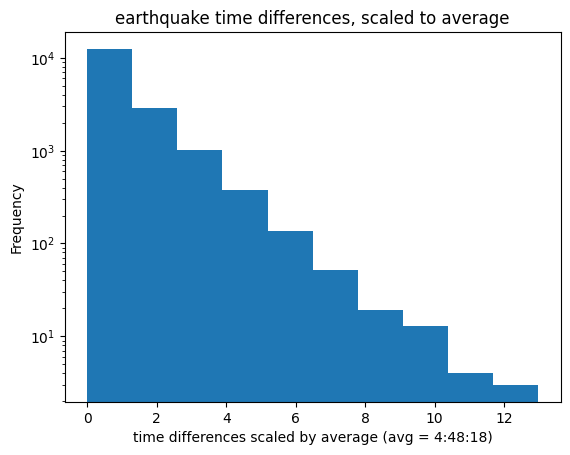

In [ ]:
eqRealGoodData["scaled_time_diff"].plot(kind="hist",
                                                       logy=True,
                                                       title="earthquake time differences, scaled to average")
pl.xlabel("time differences scaled by average (avg = 4:48:18)")

**figure 6: time gaps scaled by average time gap. we can see the same shape as in figures 3, 4, and 5, but now the x axis only goes from 0-12.**

In [ ]:
#getting datasets (THANKS TALI)

m1 = eqRealGoodData[(eqRealGoodData[['mag']] >= 2).any(axis=1)]
m2 = eqRealGoodData[(eqRealGoodData[['mag']] >= 2.5).any(axis=1)]
m3 = eqRealGoodData[(eqRealGoodData[['mag']] >= 3).any(axis=1)]
m4 = eqRealGoodData[(eqRealGoodData[['mag']] >= 3.5).any(axis=1)]
m5 = eqRealGoodData[(eqRealGoodData[['mag']] >= 4).any(axis=1)]

In [ ]:
print(len(m1))

16930


"In order to do that, for
each data set, we first calculate the mean value of the inter-event time, ⟨τ⟩k = R−1, k
and then, we disregard inter-event time values such that Rkτ < m. The elimination of the smallest values increases the mean value of the remaining rescaled inter- event times, so, we repeat the procedure: we recalculate the mean inter-event time and rescale again the data by the new rate, disregarding those values below m. The resulting data set has a mean value very close to one. "

In [ ]:
#divide it by the mean then threshold based off of m (twice)

In [ ]:
m1

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime,time_diff,scaled_time_diff
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.94500,-116.29500,5.4,C,28259,18,42,1984-01-01 05:31:34.160,0 days 04:00:36.640000,0.834570
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.34300,-117.62800,5.6,C,28260,13,30,1984-01-01 06:59:05.140,0 days 01:27:30.980000,0.303555
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.66800,-116.78000,13.8,C,28270,19,40,1984-01-01 11:10:25.290,0 days 04:11:20.150000,0.871771
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.94400,-118.32200,-1.4,C,28546,29,56,1984-01-01 13:50:47.620,0 days 02:40:22.330000,0.556259
5,1984/01/01,19:38:19.79,eq,l,2.13,c,33.96300,-116.29000,2.7,C,28553,40,49,1984-01-01 19:38:19.790,0 days 05:47:32.170000,1.205447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72214,2002/12/30,23:38:49.79,eq,l,2.05,l,35.31450,-118.66333,1.9,A,9875061,54,283,2002-12-30 23:38:49.790,0 days 01:46:57.240000,0.370975
72215,2002/12/31,05:51:00.05,eq,l,2.36,l,35.32367,-118.66067,0.1,A,9875093,65,465,2002-12-31 05:51:00.050,0 days 06:12:10.260000,1.290894
72216,2002/12/31,06:15:19.97,eq,l,2.15,l,34.00350,-116.39317,10.3,A,9875101,91,572,2002-12-31 06:15:19.970,0 days 00:24:19.920000,0.084397
72217,2002/12/31,11:34:28.03,eq,l,2.14,l,32.25667,-115.82533,6.8,C,9875125,23,118,2002-12-31 11:34:28.030,0 days 05:19:08.060000,1.106934


In [ ]:
#calculate mean and keep only times that are greater or equal to m
datasets=[m1, m2, m3, m4, m5]
dscut_01 = [] #result of this cell will be all of the new datasets in here
for i in range(5):
  m=.01
  dsnum = datasets[i]
  mean = dsnum["time_diff"].mean()
  divided = np.divide(dsnum["time_diff"],mean) #rescale here i guess?
  map = divided>=m
  dscut_01.append(divided[map]) #now we have only the good ones


In [ ]:
#repeat the procedure
dscut_01_final = [] #result of this cell will be all of the new datasets in here

for i in range(5):
  m=.01
  mean = dscut_01[i].mean()
  divided = np.divide(dscut_01[i],mean)
  #print(divided.mean())
  map = divided>=m
  dscut_01_final.append(divided[map])


In [ ]:
for i in range(5):
  print(dscut_01_final[i].mean())

1.001602540521974
1.0011561776494193
1.0
1.0000000000000002
1.0120789396280898


In [ ]:
for i in range(5):
  #print(dscut_01_final[i].mean())
  print(len(dscut_01_final[i]))

16066
4283
1100
304
82


In [ ]:
datasets=[m1, m2, m3, m4, m5]
for i in range(5):
  print(len(datasets[i]))

16930
4573
1191
333
89


In [ ]:
#time to do the ks test

sp.stats.kstest(dscut_01_final[0], dscut_01_final[1])

KstestResult(statistic=0.015334422369737422, pvalue=0.4001930430616031, statistic_location=0.12316492102098445, statistic_sign=-1)

In [ ]:
#now time to make it a loop
results=np.zeros((10,2))
for i in range(4):
  d, p = sp.stats.kstest(dscut_01_final[0], dscut_01_final[i+1])
  results[i] = d,p

In [ ]:
results

array([[0.01533442, 0.40019304],
       [0.0277142 , 0.40022828],
       [0.07579589, 0.06183192],
       [0.12510285, 0.14091953],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [ ]:
for i in range(3):
  d, p = sp.stats.kstest(dscut_01_final[1], dscut_01_final[i+2])
  results[i+4] = d,p

In [ ]:
results

array([[0.01533442, 0.40019304],
       [0.0277142 , 0.40022828],
       [0.07579589, 0.06183192],
       [0.12510285, 0.14091953],
       [0.01958929, 0.88216847],
       [0.07022254, 0.11567263],
       [0.12140453, 0.171534  ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [ ]:
for i in range(2):
  d, p = sp.stats.kstest(dscut_01_final[2], dscut_01_final[i+3])
  results[i+7] = d,p

In [ ]:
results

array([[0.01533442, 0.40019304],
       [0.0277142 , 0.40022828],
       [0.07579589, 0.06183192],
       [0.12510285, 0.14091953],
       [0.01958929, 0.88216847],
       [0.07022254, 0.11567263],
       [0.12140453, 0.171534  ],
       [0.06526316, 0.24939557],
       [0.12157428, 0.19199878],
       [0.        , 0.        ]])

In [ ]:
len(dscut_01_final[0])

16066

In [ ]:
dscut_01_final[0].dtype

dtype('float64')

In [ ]:
d, p = sp.stats.kstest(dscut_01_final[3], dscut_01_final[4])
results[9] = d,p

In [ ]:
for i in range(5):
  print(len(dscut_01_final[i]))

16066
4283
1100
304
82


In [ ]:
print(dscut_01_final[0].min(),dscut_01_final[0].max(), len(dscut_01_final[0]))

0.010013921561950632 12.334078655061731 16066


In [ ]:
results

array([[0.01533442, 0.40019304],
       [0.0277142 , 0.40022828],
       [0.07579589, 0.06183192],
       [0.12510285, 0.14091953],
       [0.01958929, 0.88216847],
       [0.07022254, 0.11567263],
       [0.12140453, 0.171534  ],
       [0.06526316, 0.24939557],
       [0.12157428, 0.19199878],
       [0.10133184, 0.48448616]])

In [ ]:
#and now really quick doing it for m=.001

#calculate mean and keep only times that are greater or equal to m
datasets=[m1, m2, m3, m4, m5]
dscut_001 = [] #result of this cell will be all of the new datasets in here
for i in range(5):
  m=.001
  dsnum = datasets[i]
  mean = dsnum["time_diff"].mean()
  divided = np.divide(dsnum["time_diff"],mean) #rescale here i guess?
  map = divided>=m
  dscut_001.append(divided[map]) #now we have only the good ones

#repeat the procedure
dscut_001_final = [] #result of this cell will be all of the new datasets in here

for i in range(5):
  m=.001
  mean = dscut_01[i].mean()
  divided = np.divide(dscut_001[i],mean)
  #print(divided.mean())
  map = divided>=m
  dscut_001_final.append(divided[map])


print("lengths")
for i in range(5):
  print(len(dscut_001_final[i]))

#ks test loop
results_001=np.zeros((10,2))
for i in range(4):
  d, p = sp.stats.kstest(dscut_001_final[0], dscut_001_final[i+1])
  results_001[i] = d,p

for i in range(3):
  d, p = sp.stats.kstest(dscut_001_final[1], dscut_001_final[i+2])
  results_001[i+4] = d,p

for i in range(2):
  d, p = sp.stats.kstest(dscut_001_final[2], dscut_001_final[i+3])
  results_001[i+7] = d,p

d, p = sp.stats.kstest(dscut_001_final[3], dscut_001_final[4])
results_001[9] = d,p

results_001

lengths
16784
4521
1172
327
86


array([[0.02275097, 0.04930843],
       [0.03878979, 0.07197834],
       [0.08198102, 0.02522601],
       [0.12093467, 0.14877323],
       [0.02433562, 0.6292118 ],
       [0.07257873, 0.07636155],
       [0.11306924, 0.21372713],
       [0.06476814, 0.22218648],
       [0.1082824 , 0.28236302],
       [0.11425219, 0.30773013]])

d is below the diagonal, p is above the diagonal.

My results:

| m = 0.01 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16066 | - | 40.0% | 40.0% | 6.18% | 14.1% |
|M >= 2.5 | 4283 | 0.015 | - | 88.2% | 11.6% | 17.2% |
|M >= 3.0 | 1100 | 0.028 | 0.020 | - | 24.9% | 19.1% |
|M >= 3.5 | 304 |  0.076 | 0.070 | 0.065 | - | 48.4% |
|M >= 4.0 | 82 | 0.125 | 0.121 | 0.122 | 0.101 | - |

| m = 0.001 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16784 | - | 4.9% | 7.2% | 2.5% | 14.8% |
|M >= 2.5 | 4521 | 0.023 | - | 62.9% | 7.6% | 21.4% |
|M >= 3.0 | 1172 | 0.039 | 0.024 | - | 22.2% | 28.2% |
|M >= 3.5 | 327 |  0.082 | 0.073 | 0.065 | - | 30.8% |
|M >= 4.0 | 86 | 0.121 | 0.113 | 0.108 | 0.114 | - |

Here are their results:

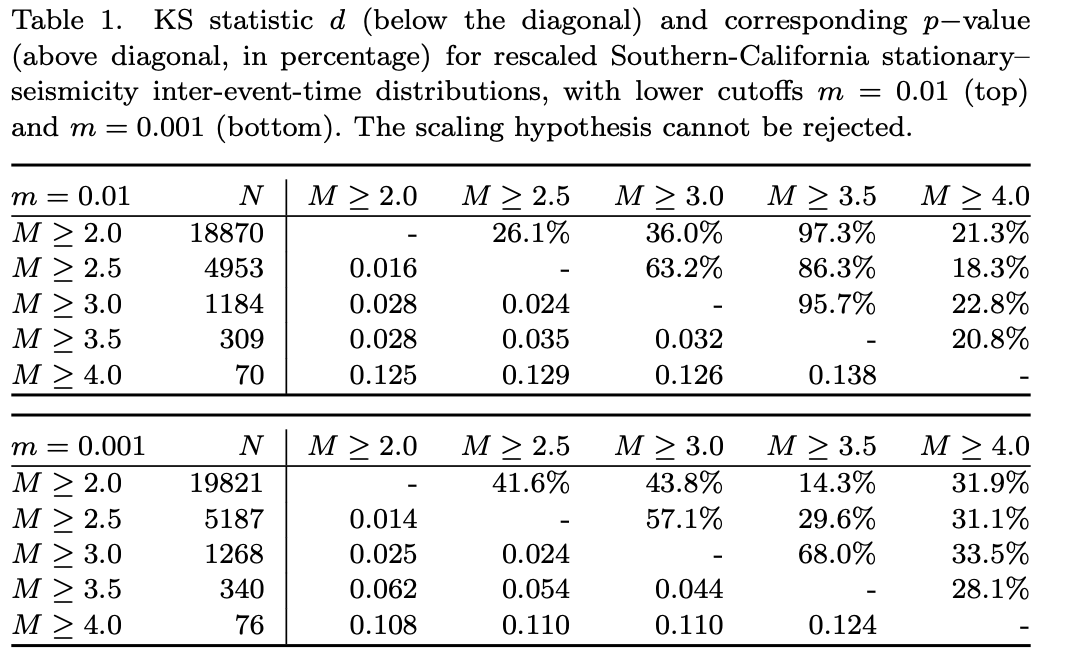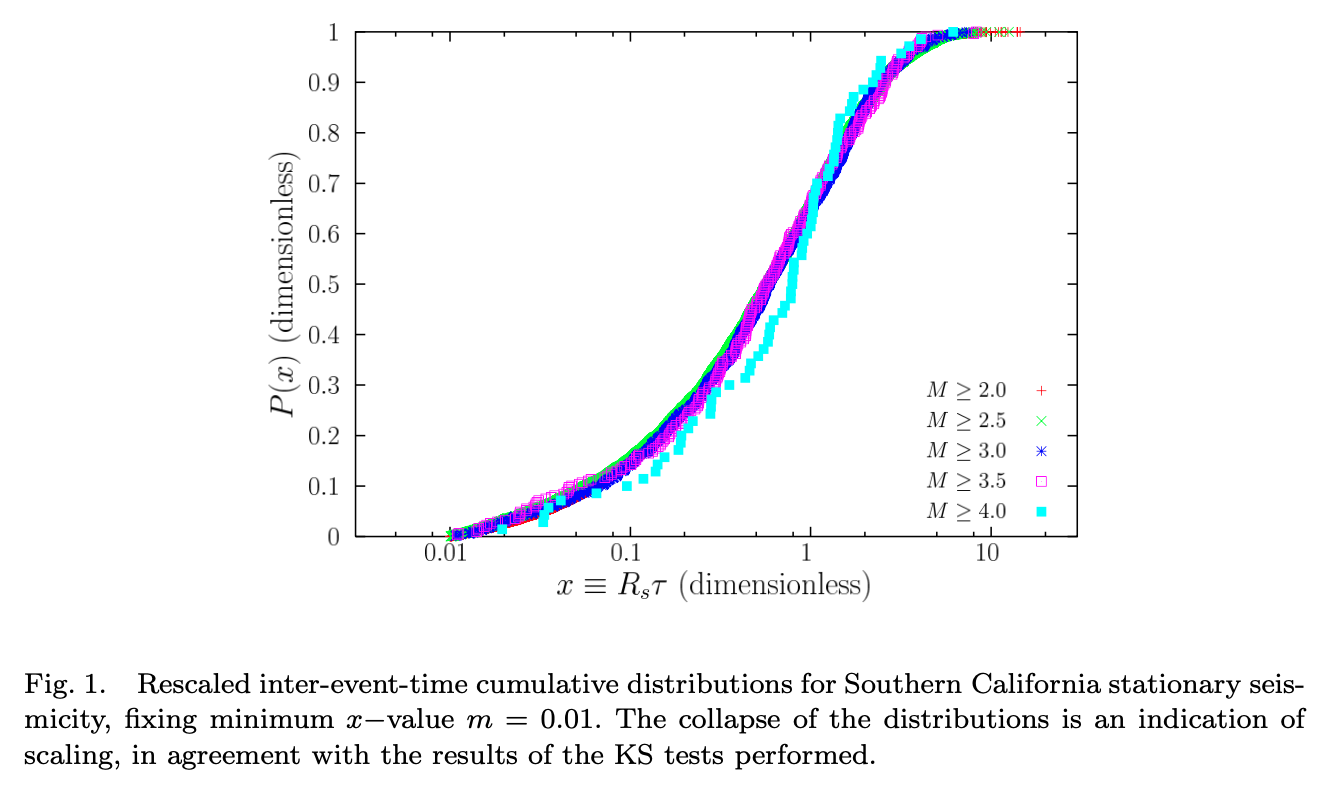

In [ ]:
dscut_01_final[0] #this is all the earthquake timing diffs for m>2

1        0.793411
2        0.288584
3        0.828777
4        0.528825
5        1.145996
           ...   
72214    0.352680
72215    1.227229
72216    0.080234
72217    1.052342
72218    2.062628
Name: time_diff, Length: 16066, dtype: float64

In [ ]:
#my plot - cumulative distributions


#bin it with hist
#cumsum it
#normalize it by dividing by the max
#plot

(n, bins) = np.histogram(dscut_01_final[0], bins=30) #n is frequency



In [ ]:
np.cumsum(n)

array([ 6437,  9591, 11618, 12942, 13801, 14452, 14923, 15249, 15469,
       15643, 15755, 15840, 15903, 15945, 15975, 16002, 16019, 16027,
       16038, 16044, 16046, 16051, 16055, 16059, 16060, 16063, 16063,
       16064, 16065, 16066])

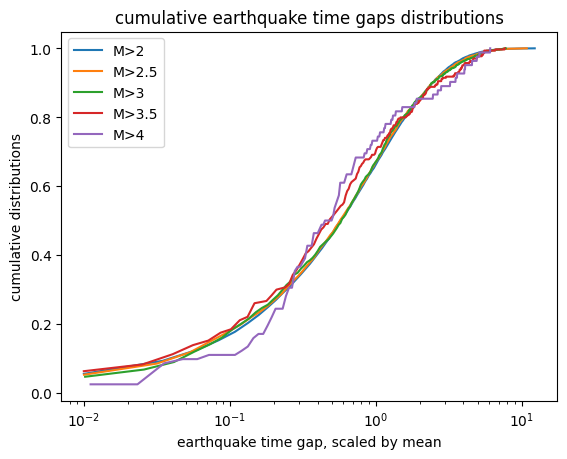

In [ ]:
for i in range(5):
  (n, bins) = np.histogram(dscut_01_final[i], bins=500)


  plt.plot(bins[:-1], np.cumsum(n)/np.max(cumsum(n)))
plt.xscale("log")
plt.legend(["M>2","M>2.5","M>3","M>3.5","M>4"])
plt.ylabel("cumulative distributions")
plt.xlabel("earthquake time gap, scaled by mean")
plt.title("cumulative earthquake time gaps distributions")
plt.show()

**figure 7: here we can see the cumulative distributions of our time gaps. this is significant because the k-s test tests the maximum difference between these cumulative distributions. we can see that the maximum difference is not too large - all the data sets lie close to on top of each other. this is confirmed analytically by the high p-values of our k-s test.**

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

**We were looking to falsify our null hypothesis at a p-value of .003 (alpha=99.7%). However, every k-s test comparison had a greater p-value than that, and thus we cannot falsify our null hypothesis: all the samples come from the same distribution. This result is identical to Correll 2018's result. We can see the distributions in my figure above, which look visually similar.**

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [ ]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption

NameError: ignored


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001